In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [21]:
# Function to read BED file and extract motifs
def read_bed_file(file_path):
    bed_data = pd.read_csv(file_path, sep="\t", skiprows=5, header=None)
    bed_data.columns = ['sequence_id', 'alg', 'func', 'start', 'end', 'score', 'strand', 'addit', 'motif_info']

    # Extract motif_name and motif_instance from motif_info
    bed_data[['motif_name', 'motif_instance']] = bed_data['motif_info'].str.extract(r'motif_name "([^"]+)" ; motif_instance "([^"]+)"')
    return bed_data

# Find the positions of the motifs in the sequence
def find_motif_positions(sequence, start, end):
    return range(start, end)

# Plot sequence with highlighted motifs
def plot_sequence_with_motifs(sequence_id, sequence, motifs):
    fig, ax = plt.subplots(figsize=(30, 8))
    ax.set_xlim(0, len(sequence))
    ax.set_ylim(0, 2)
    ax.axis('off')

    # Plot the sequence
    for i, base in enumerate(sequence):
        ax.text(i, 1, base, fontsize=12, ha='center')

    # Highlight motifs
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
    color_index = 0

    for motif in motifs:
        motif_name, start, end = motif
        positions = find_motif_positions(sequence, start, end)
        for pos in positions:
            ax.text(pos, 1, sequence[pos], fontsize=12, ha='center', color=colors[color_index % len(colors)])
        ax.text(start + (end - start) / 2, 1.5, f"{motif_name} ({start}-{end})", fontsize=10, ha='center', color=colors[color_index % len(colors)], rotation=45, verticalalignment='bottom')
        color_index += 1

    plt.title(f'Sequence ID: {sequence_id} with Highlighted Motifs')
    plt.show()

# # Example usage
# sequence_id = 'seq_test_0_0'  # Replace with your sequence ID
# sequence = 'GTTATGCGATGGGAGCTAACGCCAGCTGACGCCCGGGGCGACGGCCGCCGTGGAGCGGGGCGAGCGGCGCCAGCGAGCCTCGAGCGGGCCGCGCTGGCCTGGCGAGCAGAGGCCTGGAGGAGCGCTGAGGACACAGAAGGCTCTGGCGTCCCGCCGCGCCACGGCCTGGCGGCTCCTGCGCGCCTGTGACCCACTCGCGG'  # Replace with your sequence

# bed_file = 'path/to/your/bedfile.bed'  # Replace with the path to your BED file
# bed_data = read_bed_file(bed_file)

# # Filter motifs for the given sequence ID
# motifs = bed_data[bed_data['name'] == sequence_id][['motif_name', 'start', 'end']].values.tolist()

# plot_sequence_with_motifs(sequence_id, sequence, motifs)


In [2]:
bed_file="generated_data/dnasyn_results_motifs.bed"
bed_data = read_bed_file(bed_file)

In [38]:
bed_data.columns

Index(['sequence_id', 'alg', 'func', 'start', 'end', 'score', 'strand',
       'addit', 'motif_info', 'motif_name', 'motif_instance'],
      dtype='object')

In [5]:
sequence_id = 'seq_test_1_0_0'
sequence = 'GTTGAAAGCTTAGCTCCCAGAGAAGTTTGGCAGGGCTTGAGAAAGTTGAGCTTGGCTGCGTGGGAGAGGTTCAACGCGTCGGGTGAAGCTGAATAATGTACATAGAAACTTGCGGTCAACGTAGTCTTACTTTTGTTTTCAGTCCTCTGCTCTACAGCATCTATTTCCCTCCGGACTTAAGATTTTTTCCCAGTGCCTCT'
motifs = bed_data[bed_data['sequence_id'] == sequence_id][['motif_name', 'start', 'end']].values.tolist()

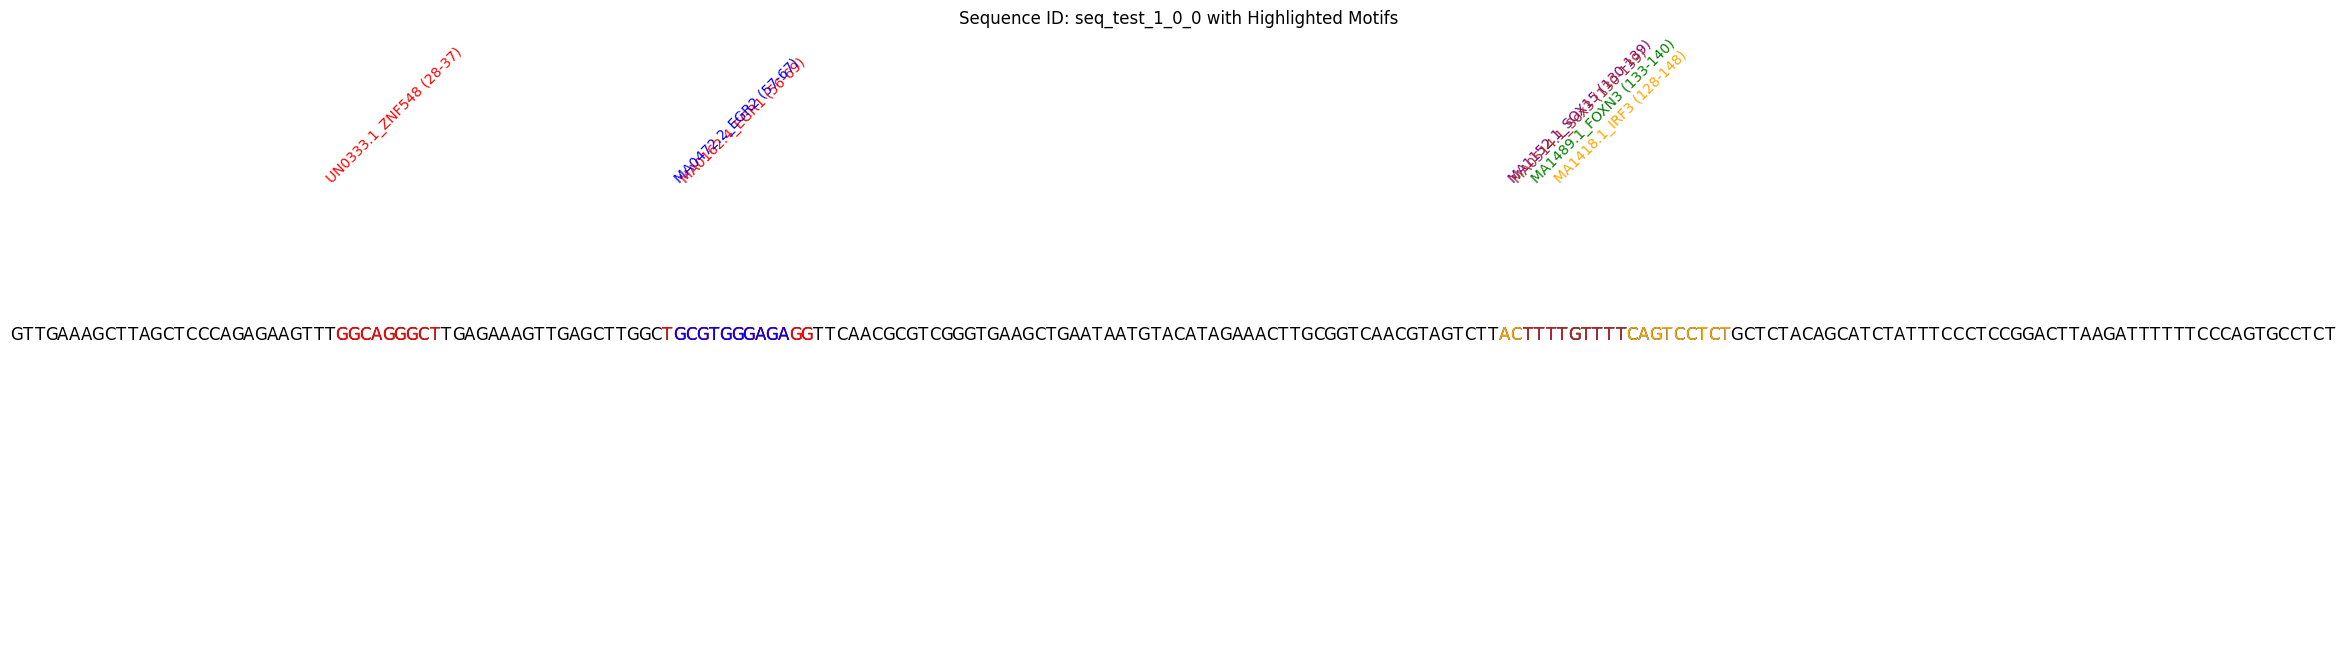

In [6]:
plot_sequence_with_motifs(sequence_id, sequence, motifs)

# Cluster specific motifs

In [2]:
df_peak_motifs = pd.read_csv("generated_data/peak_motif_count.csv", index_col=0)
df_peak_motifs

,MA0146.2_Zfx,MA1128.1_FOSL1::JUN,MA0092.1_Hand1::Tcf3,MA1476.1_DLX5,MA0669.1_NEUROG2,UN0146.1_ZBTB40,MA0630.1_SHOX,MA1647.1_PRDM4,MA0486.2_HSF1,MA0009.2_TBXT,...,MA1148.1_PPARA::RXRA,MA0899.1_HOXA10,UN0196.1_ZNF479,MA0848.1_FOXO4,MA1099.2_HES1,MA0076.2_ELK4,MA0790.1_POU4F1,MA0760.1_ERF,MA0493.1_Klf1,cluster
chr1_29236_29737_-,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
chr1_199774_200275_-,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
chr1_629102_629950_+,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
chr1_630597_631171_+,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
chr1_632356_633841_+,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrY_21028687_21029188_-,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
chrY_21138232_21138733_+,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
chrY_21254335_21254836_+,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
chrY_57067464_57067965_+,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2


In [3]:
cluster_centroids = {}

for cluster in df_peak_motifs['cluster'].unique():
    sub_df = df_peak_motifs[df_peak_motifs['cluster'] == cluster].drop(columns=['cluster'])
    centroid = sub_df.mean(axis=0)
    cluster_centroids[cluster] = centroid
    

In [31]:
import pandas as pd
from Bio import SeqIO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Function to read BED file and extract motifs
def read_bed_file(file_path):
    bed_data = pd.read_csv(file_path, sep="\t", skiprows=5, header=None)
    bed_data.columns = ['sequence_id', 'alg', 'func', 'start', 'end', 'score', 'strand', 'addit', 'motif_info']

    # Extract motif_name and motif_instance from motif_info
    bed_data[['motif_name', 'motif_instance']] = bed_data['motif_info'].str.extract(r'motif_name "([^"]+)" ; motif_instance "([^"]+)"')
    return bed_data

# Function to read fasta file
def read_fasta_file(fasta_file):
    fasta_sequences = SeqIO.to_dict(SeqIO.parse(fasta_file, 'fasta'))
    return fasta_sequences

# Find the positions of the motifs in the sequence
def find_motif_positions(sequence, start, end):
    return range(start, end)

# Plot sequence with highlighted motifs
def plot_sequence_with_motifs(sequence_id, sequence, motifs, cluster_motifs, motif_to_color, cluster, cluster_colors):
    fig, ax = plt.subplots(figsize=(30, 8))
    ax.set_xlim(0, len(sequence))
    ax.set_ylim(0, 10)  # Increased ylim for better stacking
    ax.axis('off')

    # Plot the sequence
    for i, base in enumerate(sequence):
        ax.text(i, 1, base, fontsize=12, ha='center')

    # Highlight motifs
    y_positions = np.zeros(len(sequence)) + 2  # Starting y-position for motif labels

    for motif in motifs:
        motif_name, start, end = motif
        cluster_color = motif_to_color.get(motif_name, 'black')
        positions = find_motif_positions(sequence, start, end)
        for pos in positions:
            ax.text(pos, 1, sequence[pos], fontsize=12, ha='center', color=cluster_color)
        
        # Find the next available y-position
        mid_pos = start + (end - start) // 2
        y_pos = np.max(y_positions[start:end]) + 0.2  # Update y-positions for the occupied range

        ax.text(mid_pos, y_pos, f"{motif_name} ({start}-{end})", fontsize=10, ha='center', color=cluster_color, verticalalignment='bottom')
        y_positions[start:end] = y_pos

    # # Add title with cluster number
    # plt.title(f'Sequence ID: {sequence_id} with Highlighted Motifs (Cluster {cluster})')

    # # Add legend for cluster colors explicitly
    # legend_handles = [patches.Patch(color=color, label=f'Cluster {clust}') for clust, color in cluster_colors.items()]
    # plt.legend(handles=legend_handles, loc='upper right')

    plt.show()

# Function to calculate motif content
def calculate_motif_content(motifs, cluster_motifs):
    motif_counts = motifs[motifs['motif_name'].isin(cluster_motifs)]
    return motif_counts.shape[0]

# Normalize the motif scores for each cluster and assign motifs to clusters
def assign_motifs_to_clusters(cluster_centroids):
    motif_assignments = {}
    all_motifs = set()
    for centroid in cluster_centroids.values():
        all_motifs.update(centroid.index)

    for motif in all_motifs:
        best_cluster = None
        best_score = -np.inf
        for cluster, centroid in cluster_centroids.items():
            if motif in centroid:
                normalized_score = centroid[motif] / np.linalg.norm(centroid)
                if normalized_score > best_score:
                    best_score = normalized_score
                    best_cluster = cluster
        if best_cluster:
            if best_cluster not in motif_assignments:
                motif_assignments[best_cluster] = []
            motif_assignments[best_cluster].append(motif)
    
    return motif_assignments

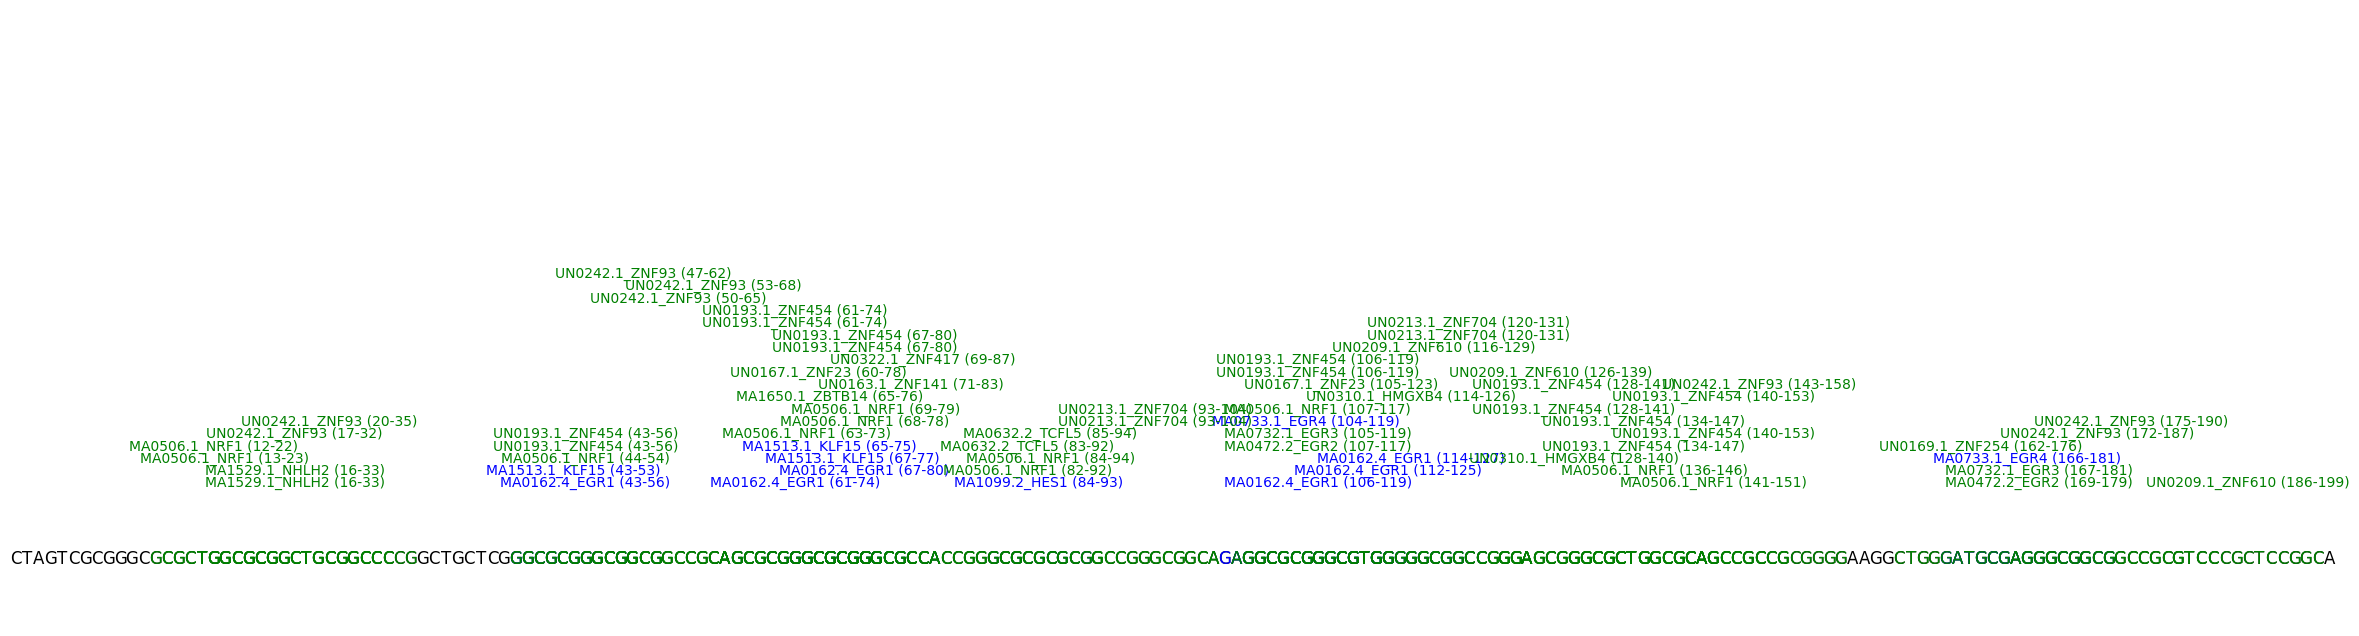

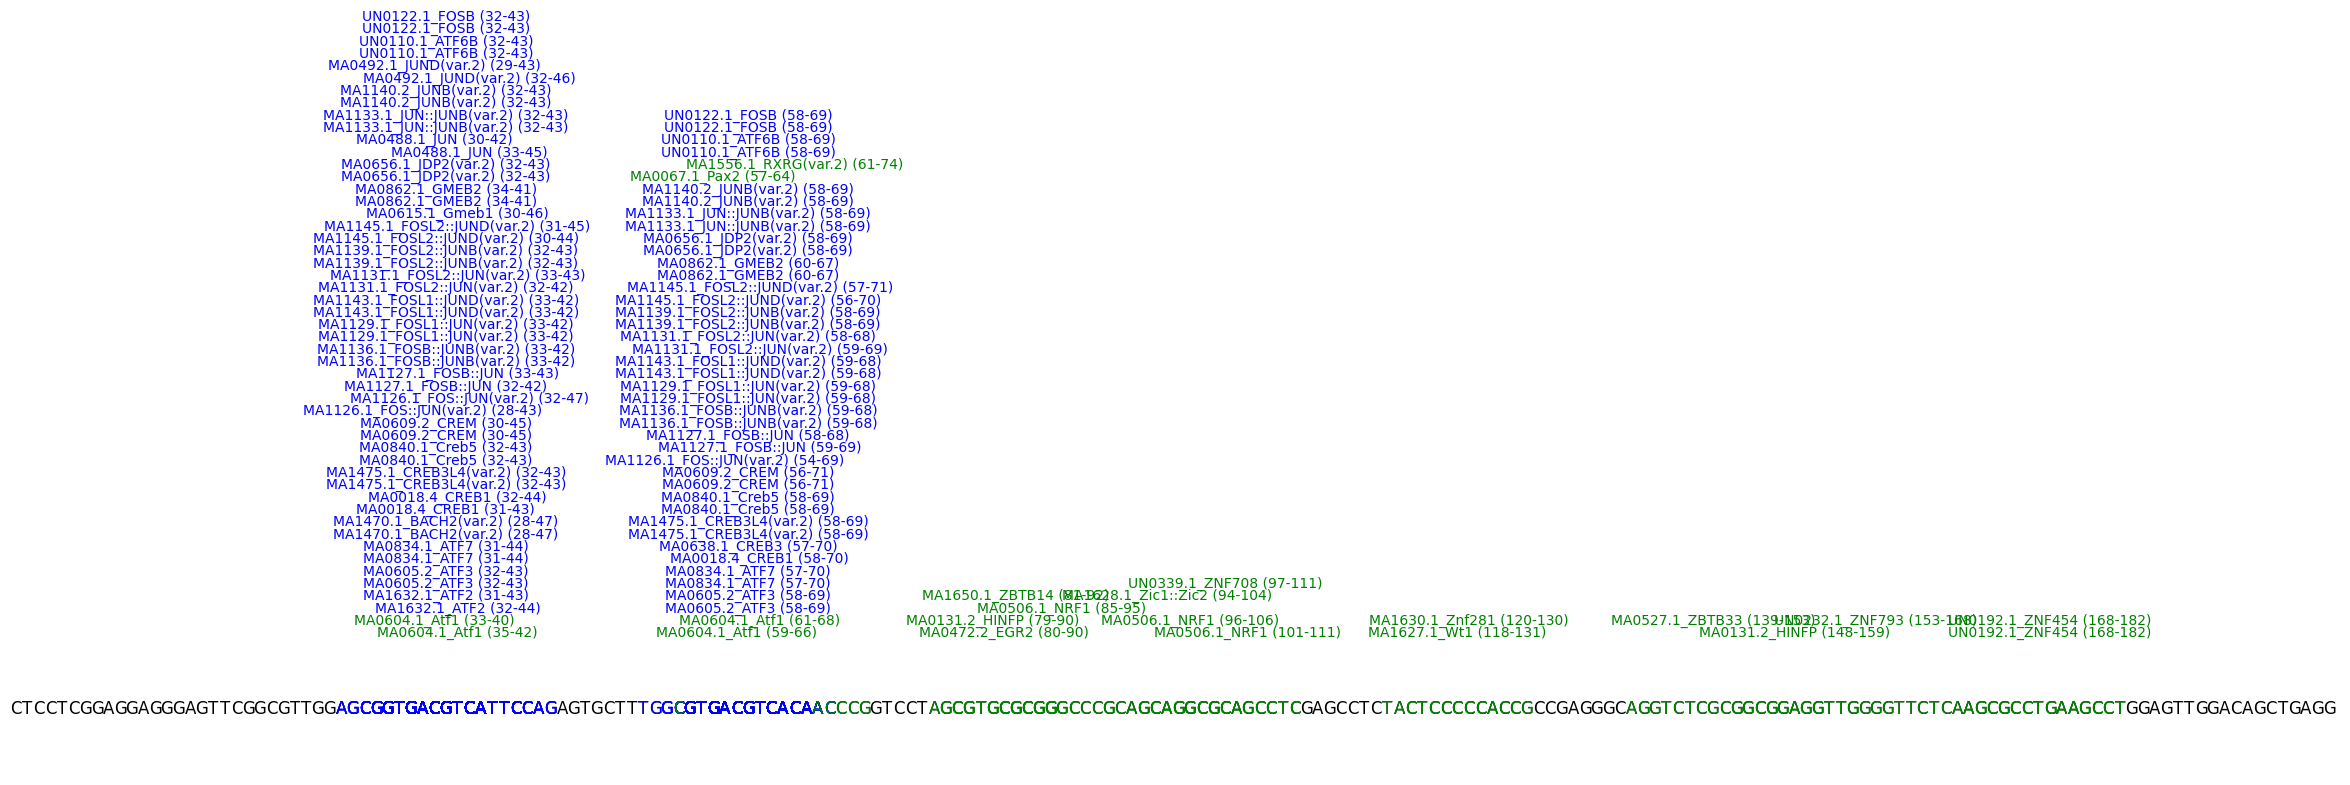

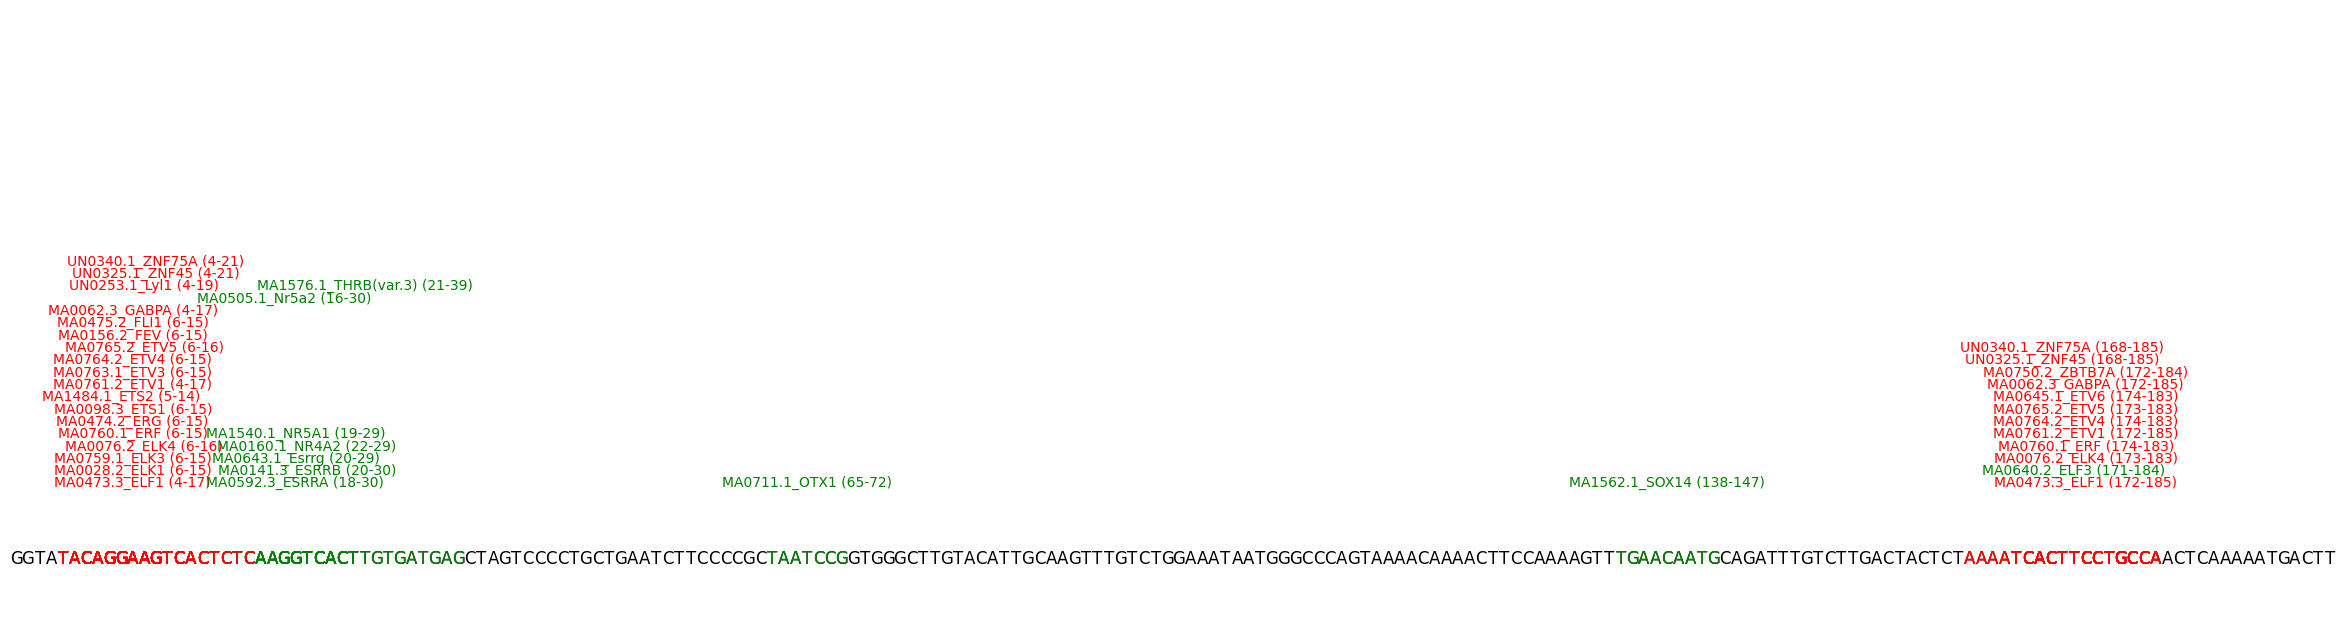

In [32]:

# Example usage
bed_file = 'generated_data/dnasyn_results_motifs.bed'  # Replace with the path to your BED file
fasta_file = 'generated_data/dnasynthetic_motifs.fasta'  # Replace with the path to your fasta file

# Read the BED and fasta files
bed_data = read_bed_file(bed_file)
fasta_sequences = read_fasta_file(fasta_file)

# Assign motifs to clusters
motif_assignments = assign_motifs_to_clusters(cluster_centroids)

# Define colors for each cluster
cluster_colors = {
    1: 'red',
    2: 'green',
    3: 'blue'
}

# Create a mapping from motif names to cluster colors
motif_to_color = {}
for cluster, motifs in motif_assignments.items():
    for motif in motifs:
        motif_to_color[motif] = cluster_colors[cluster]

# Iterate through clusters
for cluster, cluster_motifs in motif_assignments.items():
    cluster_sequences = bed_data[bed_data['sequence_id'].str.contains(f'seq_test_{cluster}_')]
    
    max_motif_content = 0
    best_sequence_id = None
    best_motifs = None

    for seq_id in cluster_sequences['sequence_id'].unique():
        sequence_motifs = cluster_sequences[cluster_sequences['sequence_id'] == seq_id]
        motif_content = calculate_motif_content(sequence_motifs, cluster_motifs)
        
        if motif_content > max_motif_content:
            max_motif_content = motif_content
            best_sequence_id = seq_id
            best_motifs = sequence_motifs[['motif_name', 'start', 'end']].values.tolist()

    if best_sequence_id and best_sequence_id in fasta_sequences:
        sequence = str(fasta_sequences[best_sequence_id].seq)
        plot_sequence_with_motifs(best_sequence_id, sequence, best_motifs, cluster_motifs, motif_to_color, cluster, cluster_colors)


In [25]:
for x,y in motif_assignments.items():
    print(x, len(y))

2 813
3 75
1 28


# Now train data's turn

In [26]:
import os
fasta = "generated_data/train.fasta"

In [27]:
# os.system(f"gimme scan {fasta} -p JASPAR2020_vertebrates -g hg38 -n 20 > generated_data/train_results_motifs.bed")

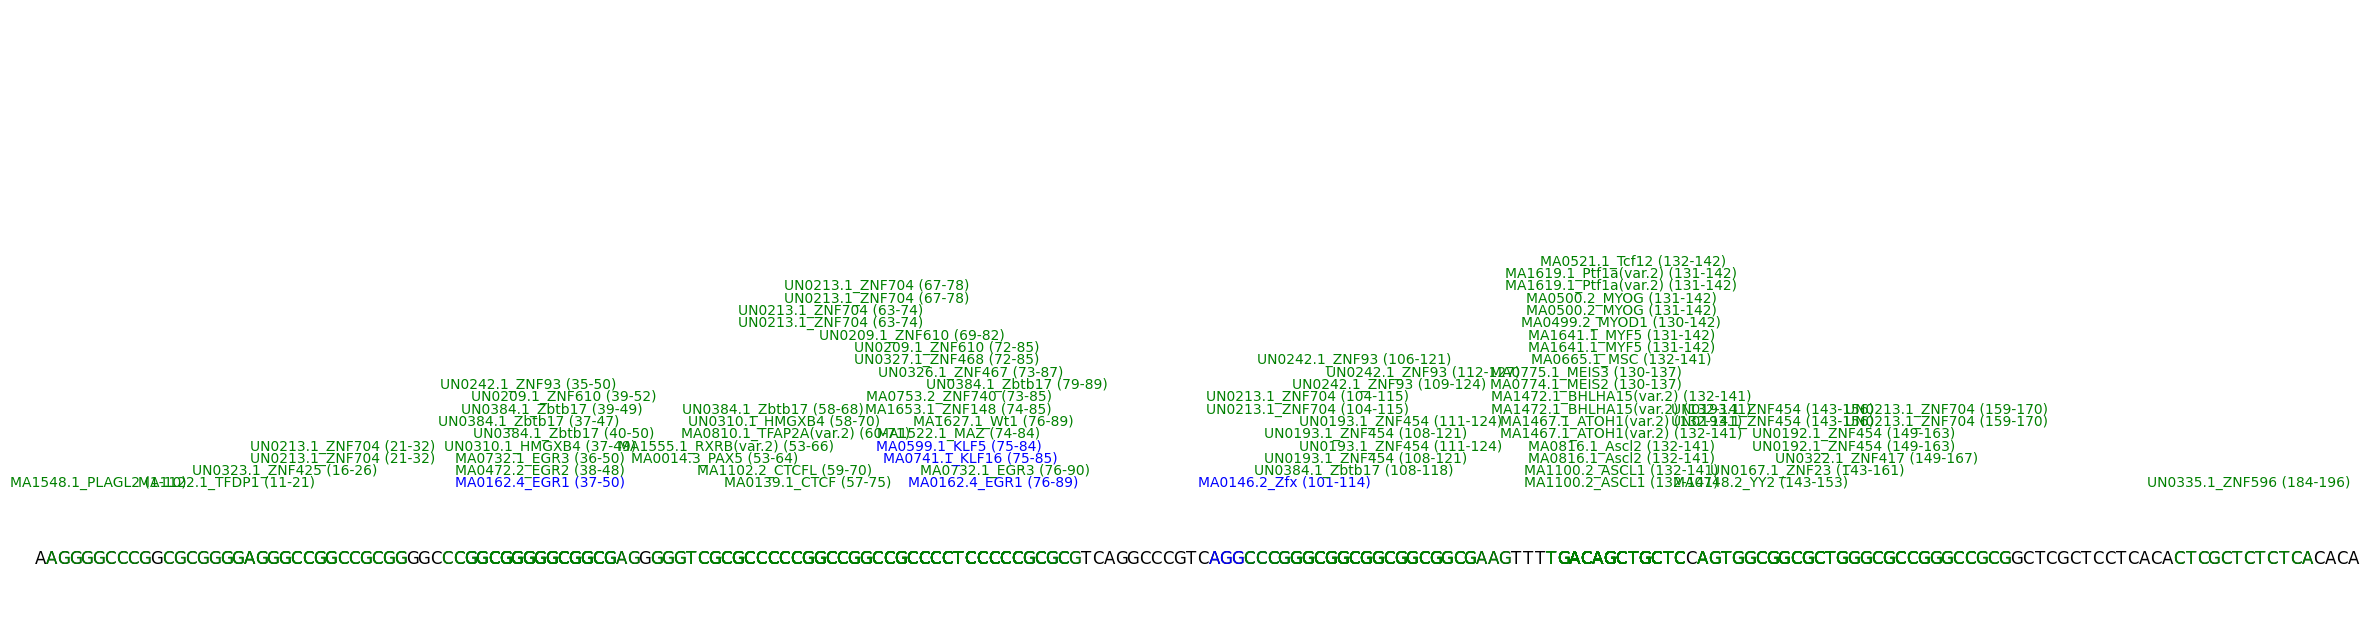

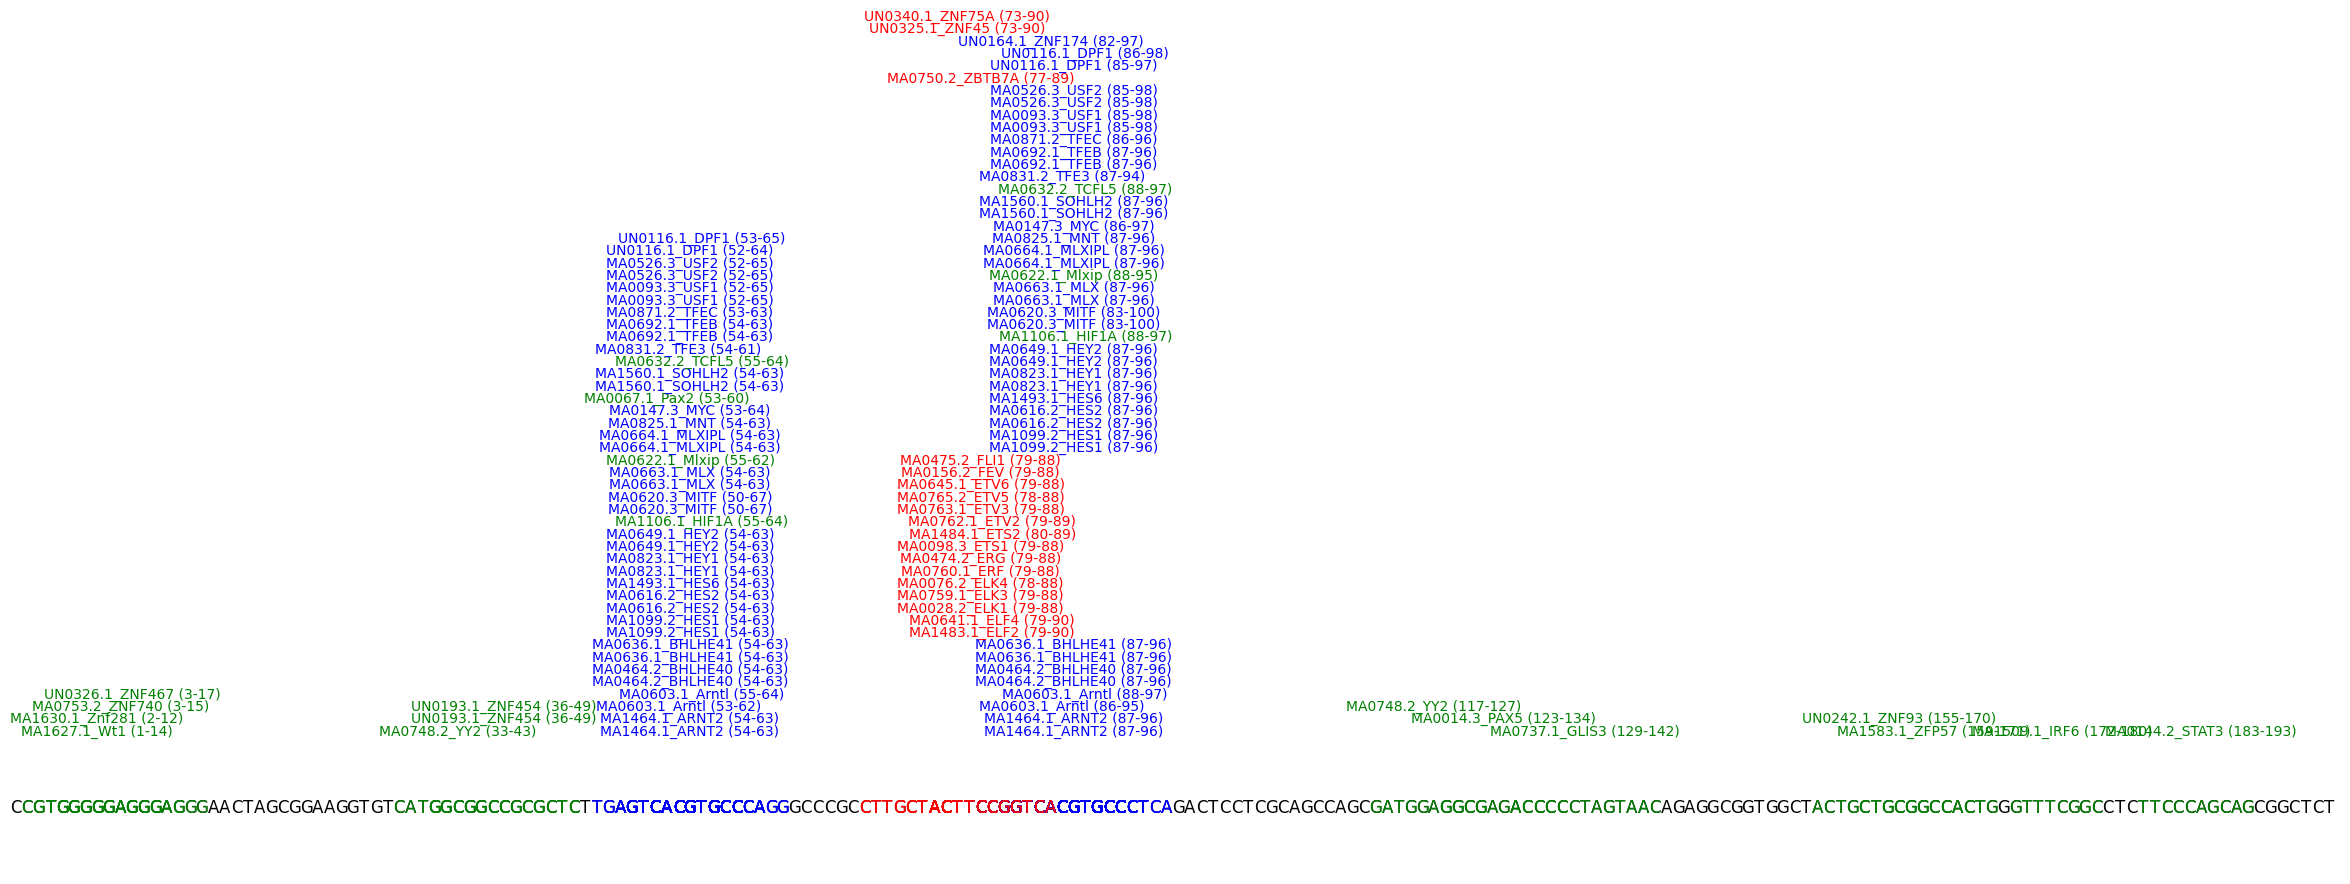

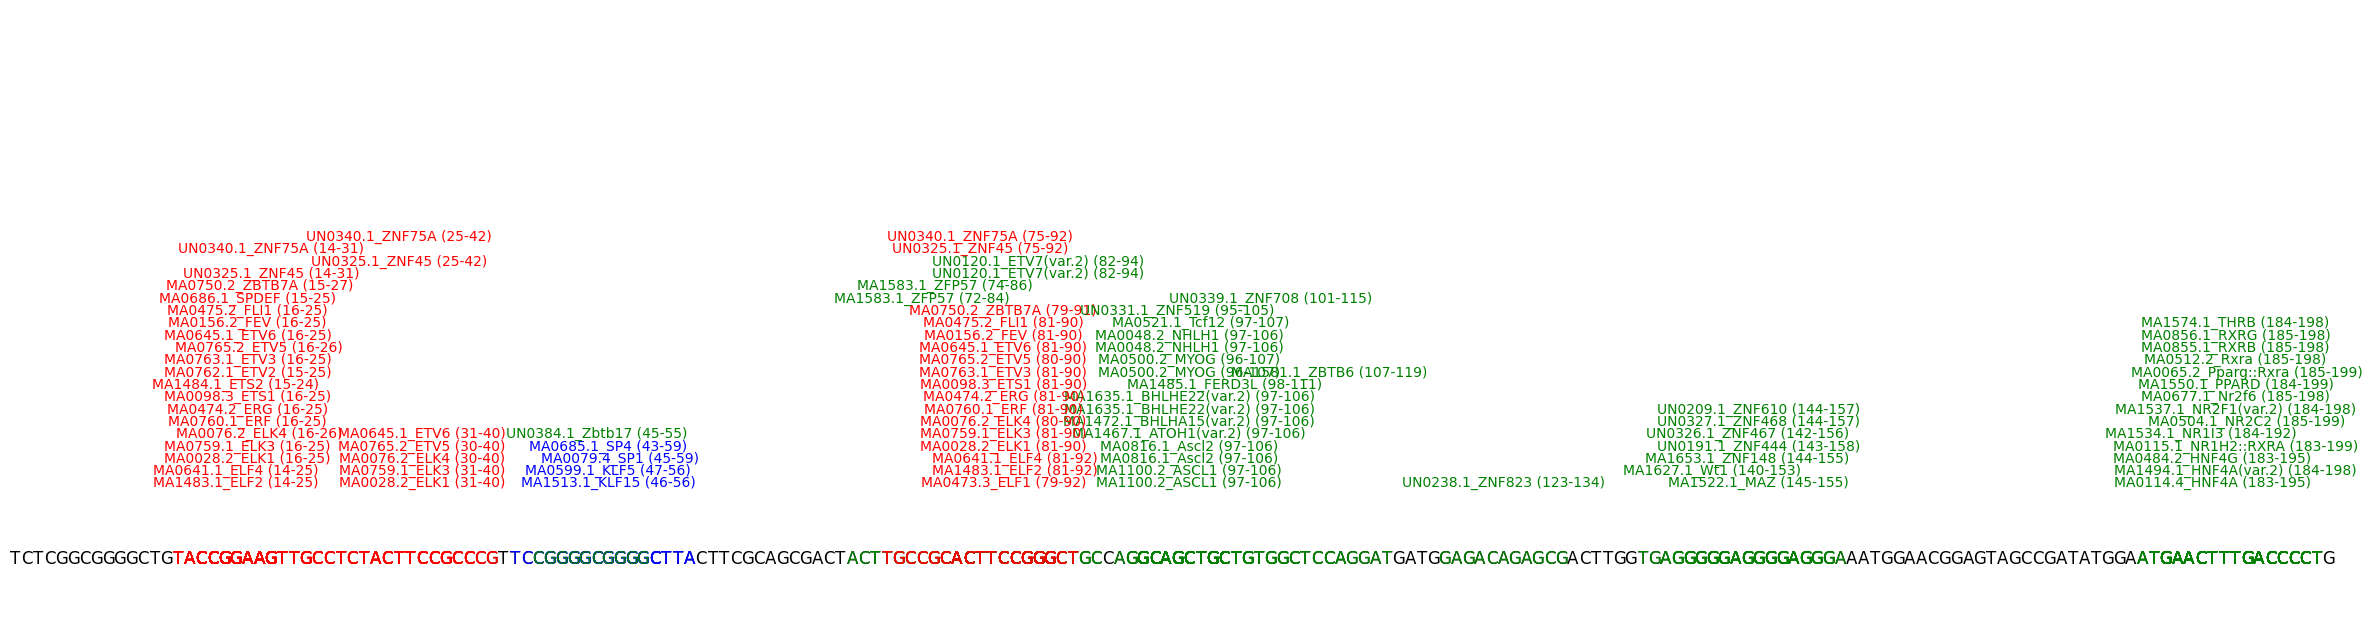

In [28]:
# Extract cluster number from sequence ID
def extract_cluster_number(sequence_id):
    return sequence_id.split('_')[-1].replace('ct', '')


# Example usage
bed_file = 'generated_data/train_results_motifs.bed'  # Replace with the path to your BED file
fasta_file = 'generated_data/train.fasta'  # Replace with the path to your fasta file

# Read the BED and fasta files
bed_data = read_bed_file(bed_file)
fasta_sequences = read_fasta_file(fasta_file)


# Assign motifs to clusters
motif_assignments = assign_motifs_to_clusters(cluster_centroids)

# Define colors for each cluster
cluster_colors = {
    1: 'red',
    2: 'green',
    3: 'blue'
}

# Create a mapping from motif names to cluster colors
motif_to_color = {}
for cluster, motifs in motif_assignments.items():
    for motif in motifs:
        motif_to_color[motif] = cluster_colors[cluster]

# Iterate through clusters
for cluster, cluster_motifs in motif_assignments.items():
    cluster_sequences = bed_data[bed_data['sequence_id'].str.contains(f'_ct{cluster}$')]
    
    max_motif_content = 0
    best_sequence_id = None
    best_motifs = None

    for seq_id in cluster_sequences['sequence_id'].unique():
        sequence_motifs = cluster_sequences[cluster_sequences['sequence_id'] == seq_id]
        motif_content = calculate_motif_content(sequence_motifs, cluster_motifs)
        
        if motif_content > max_motif_content:
            max_motif_content = motif_content
            best_sequence_id = seq_id
            best_motifs = sequence_motifs[['motif_name', 'start', 'end']].values.tolist()

    if best_sequence_id and best_sequence_id in fasta_sequences:
        sequence = str(fasta_sequences[best_sequence_id].seq)
        plot_sequence_with_motifs(best_sequence_id, sequence, best_motifs, cluster_motifs, motif_to_color, cluster, cluster_colors)
